In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import scipy.linalg
import scipy.optimize



from mpmath import *
mp.dps=15; mp.pretty=True

import os
import subprocess

In [2]:
def format_print(cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'

In [3]:
# class Jackknife:
#     def __init__( self, len_data, binsize ):
#         self.binsize = binsize
#         self.nbins = int(np.floor( len_data/self.binsize ))
#         self.N = self.binsize * self.nbins
#         self.jack_avg = []
#         self.est = 0
#         self.var_est = 0

#     def set( self, func, list_of_data ):
#         for i in range( self.nbins ):
#             self.jack_avg.append( func( i, self.binsize, list_of_data ) )

#     def do_it( self ):
#         self.est=0
#         for i in range( 0, self.nbins ):
#             self.est += self.jack_avg[i]
#         self.est /= self.nbins

#         self.var_est=0
#         for i in range( 0, self.nbins ):
#             self.var_est += ( self.jack_avg[i] - self.est )**2
#         self.var_est /= self.nbins
#         self.var_est *= self.nbins -1

#     def mean( self ):
#         return self.est

#     def var( self ):
#         return self.var_est

#     def err( self ):
#         return np.sqrt(self.var_est)
    
# class Jackknife2:
#     def __init__( self ):
#         self.binsize = binsize
#         self.nbins = int(np.floor( len_data/self.binsize ))
#         self.N = self.binsize * self.nbins
#         self.jack_avg = []
#         self.est = 0
#         self.var_est = 0

#     def set( self, list_of_data,  ):
#         self.jack_avg = np.array(list_of_data)

#     def do_it( self ):
#         self.est=0
#         for i in range( 0, self.nbins ):
#             self.est += self.jack_avg[i]
#         self.est /= self.nbins

#         self.var_est=0
#         for i in range( 0, self.nbins ):
#             self.var_est += ( self.jack_avg[i] - self.est )**2
#         self.var_est /= self.nbins
#         self.var_est *= self.nbins -1

#     def mean( self ):
#         return self.est

#     def var( self ):
#         return self.var_est

#     def err( self ):
#         return np.sqrt(self.var_est)

# def simple_mean(i, binsize, np_data):
#     resmpld=np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
#     return np.mean(resmpld, axis=0)

In [4]:
def rearrange(corr_, Lx_, Ly_):
    lx_half=int(Lx_/2)
    ly_half=int(Ly_/2)
    tmp=[[corr_[(x-lx_half+Lx_)%Lx_,(y-ly_half+Ly_)%Ly_] for x in range(Lx_)] for y in range(Ly_)]
    return np.array(tmp)

In [12]:
r=8

Lx=12
Ly=r*Lx

lx_half=int(Lx/2)
ly_half=int(Ly/2)

In [13]:
a_lat=(np.pi*2.0/Lx)

In [14]:
ensemble_id=str(Lx)+"_"+str(Ly)+"_1.000_1.000_0.000"

In [15]:
nmin=10000
nmax=1750000
nint=10000

nrange = np.arange(nmin, nmax+nint, nint)

In [16]:
ensemble_id

'12_96_1.000_1.000_0.000'

In [17]:
mag_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/mag_"+str(i)+".dat")
    mag_list_.append(tmp)
    
mag_list=np.array(mag_list_)

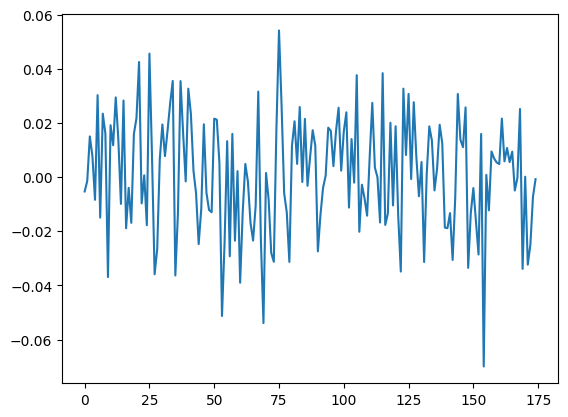

In [18]:
plt.plot(mag_list)

In [19]:
mag_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/mag_"+str(i)+".dat")
    mag_list_.append(tmp)
    
mag_list=np.array(mag_list_)

In [20]:
s_s_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/s_s_"+str(i)+".dat")
    s_s_list_.append(tmp)
    
s_s_list=np.array(s_s_list_)

In [21]:
txx_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txx_"+str(i)+".dat")
    txx_list_.append(tmp)
    
txx_list=np.array(txx_list_)

In [22]:
txy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txy_"+str(i)+".dat")
    txy_list_.append(tmp)
    
txy_list=np.array(txy_list_)

In [23]:
tyy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/tyy_"+str(i)+".dat")
    tyy_list_.append(tmp)
    
tyy_list=np.array(tyy_list_)

In [24]:
txx_txx_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txx_txx_"+str(i)+".dat")
    txx_txx_list_.append(tmp)
    
txx_txx_list=np.array(txx_txx_list_)

In [25]:
txx_txy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txx_txy_"+str(i)+".dat")
    txx_txy_list_.append(tmp)
    
txx_txy_list=np.array(txx_txy_list_)

In [26]:
txx_tyy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txx_tyy_"+str(i)+".dat")
    txx_tyy_list_.append(tmp)
    
txx_tyy_list=np.array(txx_tyy_list_)

In [27]:
txy_txx_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txy_txx_"+str(i)+".dat")
    txy_txx_list_.append(tmp)
    
txy_txx_list=np.array(txy_txx_list_)

In [28]:
txy_txy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txy_txy_"+str(i)+".dat")
    txy_txy_list_.append(tmp)
    
txy_txy_list=np.array(txy_txy_list_)

In [29]:
txy_tyy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/txy_tyy_"+str(i)+".dat")
    txy_tyy_list_.append(tmp)
    
txy_tyy_list=np.array(txy_tyy_list_)

In [30]:
tyy_txx_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/tyy_txx_"+str(i)+".dat")
    tyy_txx_list_.append(tmp)
    
tyy_txx_list=np.array(tyy_txx_list_)

In [31]:
tyy_txy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/tyy_txy_"+str(i)+".dat")
    tyy_txy_list_.append(tmp)
    
tyy_txy_list=np.array(tyy_txy_list_)

In [32]:
tyy_tyy_list_=[]

for i in nrange:
    tmp=np.loadtxt(ensemble_id+"/tyy_tyy_"+str(i)+".dat")
    tyy_tyy_list_.append(tmp)
    
tyy_tyy_list=np.array(tyy_tyy_list_)

In [33]:
nskip=1
binsize=2
n_bins=int( (txx_list.shape[0]-nskip-binsize+1)/binsize )

In [34]:
t1=txx_list
t2=txx_list
t1t2=txx_txx_list

ft_jk_list_=[]
conn_jk_list_=[]

for i_jk in range(n_bins):
    print(i_jk)
    t1t2_jk=np.mean(np.delete(t1t2[nskip:], np.s_[i_jk:i_jk+binsize], axis=0), axis=0)
    t1_jk=np.mean(np.delete(t1[nskip:], np.s_[i_jk:i_jk+binsize], axis=0), axis=0)
    t2_jk=np.mean(np.delete(t2[nskip:], np.s_[i_jk:i_jk+binsize], axis=0), axis=0)
    #
    t1t2_conn_jk=t1t2_jk-t1_jk*t2_jk
    #
    tmp=np.array(
        [
            [
                np.sum([t1t2_conn_jk[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
                for t in range(r*Lx)]
            for k in range(Lx)
        ])
    #
    conn_jk_list_.append(tmp)
    ft_jk_list_.append(tmp)
ft_jk_list=np.array(ft_jk_list_)
conn_jk_list=np.array(conn_jk_list_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85


In [35]:
ft_jk_mean=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(n_bins):
    ft_jk_mean+=ft_jk_list[i_jk]

ft_jk_mean/=n_bins

In [36]:
ft_jk_var=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(1,n_bins):
    ft_jk_var += ( ft_jk_list[i_jk]-ft_jk_mean )**2

ft_jk_var*=(n_bins-1.0)/n_bins
ft_jk_err=np.sqrt(ft_jk_var)

In [37]:
# tmax=40

# x=np.arange(tmax)

# ####

# ell=0

# y=ft_jk_mean[ell][:tmax]
# dy=np.sqrt(ft_jk_var[ell][:tmax])
# plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))

# delta=1.0
# coeff=0.0025
# plt.plot(coeff*np.exp(-delta*a_lat*x), ls="dashed")

# ####

# ell=1

# y=ft_jk_mean[ell][:tmax]
# dy=np.sqrt(ft_jk_var[ell][:tmax])
# plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))

# delta=2.0
# coeff=0.0028
# plt.plot(coeff*np.exp(-delta*a_lat*x), ls="dashed")

# ####

# ell=2

# y=ft_jk_mean[ell][:tmax]
# dy=np.sqrt(ft_jk_var[ell][:tmax])
# plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))

# delta=3.0
# coeff=0.0028
# plt.plot(coeff*np.exp(-delta*a_lat*x), ls="dashed")

# ####

# # plt.plot(ft[1][:40], label="$\\ell=1$")
# # plt.plot(ft[2][:40], label="$\\ell=2$")
# # plt.plot(ft[3][:40], label="$\\ell=3$")

# # plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
# plt.legend()
# # plt.title("odd part (sin)")

# plt.yscale("log")

# # plt.xlim(0.0,10.0)
# plt.ylim(1.0e-6, 1.0e-2)

# plt.savefig("e1_e1_""cos.pdf")

In [38]:
# x=np.arange(Ly)
# ell=5
# y=ft_jk_mean[ell]
# dy=ft_jk_err[ell]
# np.savetxt("Lx"+str(Lx)+"_E1E1_cos_ell"+str(ell)+".dat", np.array([x,y,dy]).T,
#           header="t \t\t\t mean \t\t\t  err")

In [39]:
def ell0_scalar(t, A):
    return A * np.exp(-a_lat*t) * ( 1.0 + 1.0/np.tanh(a_lat*t) )

def ell1_scalar(t, A):
    return A * np.exp(-a_lat*t) * 1.0/np.sinh(a_lat*t)

def ell2_scalar(t, A):
    return A * np.exp(-a_lat*t) * ( -1.0 + 1.0/np.tanh(a_lat*t) )

In [40]:
ellmax=3

fit_list2=[
    [0, 2, 35],
    [1, 2, 20],
    [2, 2, 15],
]

(1e-06, 0.01)

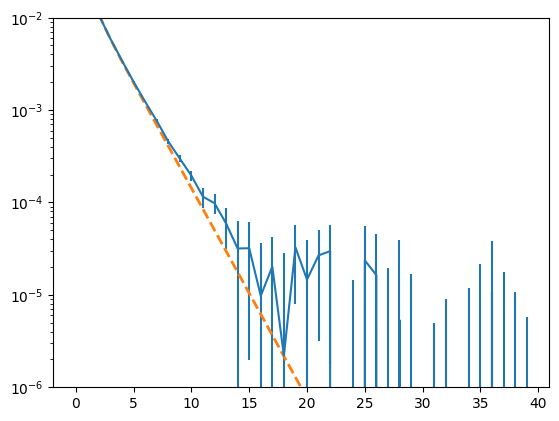

In [41]:
tmax=40

x=np.arange(tmax)

####

ell=0
fit_min=fit_list2[ell][1]
fit_max=fit_list2[ell][2]

y0d=ft_jk_mean[ell][:tmax]
dy0d=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y0d,dy0d, label="$\\ell=$"+str(ell))

###################

fitm=fit_list2[ell][1]
fitM=fit_list2[ell][2]
ft_jk_mean[ell][fit_min:fit_max]

x=np.arange(fitm, fitM, dtype=int)
y=ft_jk_mean[ell][fitm:fitM]
dy=np.sqrt(ft_jk_var[ell][fitm:fitM])

par, var = sp.optimize.curve_fit(ell0_scalar, x, y, p0=[0.01], sigma=dy)
#    par, var = sp.optimize.curve_fit(two_exp, x, y, p0=[1.0, 1.0, 1.0, 1.0], sigma=dy)
#     pars_.append(par)
#     vars_.append(var)

x0f=np.arange(fitm, fitM, dtype=int)
y0f=ell0_scalar(x, par[0])
plt.plot(x0f, y0f, ls="dashed", linewidth=2)

###################

plt.yscale("log")
plt.ylim(1.0e-6, 1.0e-2)

In [42]:
pars0=par[0]
errs0=np.sqrt(var[0,0])

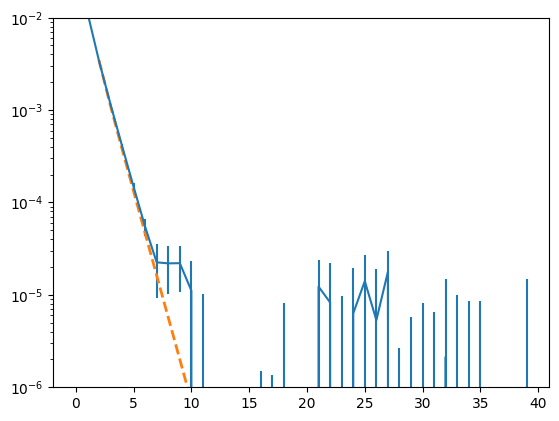

In [43]:
tmax=40

x=np.arange(tmax)

####

ell=1
fit_min=fit_list2[ell][1]
fit_max=fit_list2[ell][2]

y1d=ft_jk_mean[ell][:tmax]
dy1d=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y1d,dy1d, label="$\\ell=$"+str(ell))

###################

fitm=fit_list2[ell][1]
fitM=fit_list2[ell][2]
ft_jk_mean[ell][fit_min:fit_max]

x=np.arange(fitm, fitM, dtype=int)
y=ft_jk_mean[ell][fitm:fitM]
dy=np.sqrt(ft_jk_var[ell][fitm:fitM])

par, var = sp.optimize.curve_fit(ell1_scalar, x, y, p0=[0.01], sigma=dy)
#    par, var = sp.optimize.curve_fit(two_exp, x, y, p0=[1.0, 1.0, 1.0, 1.0], sigma=dy)
#     pars_.append(par)
#     vars_.append(var)

x1f=np.arange(fitm, fitM, dtype=int)
y1f=ell1_scalar(x, par[0])
plt.plot(x1f, y1f, ls="dashed", linewidth=2)

###################

plt.yscale("log")
plt.ylim(1.0e-6, 1.0e-2)

plt1=plt

In [44]:
pars1=par[0]
errs1=np.sqrt(var[0,0])

(1e-06, 0.01)

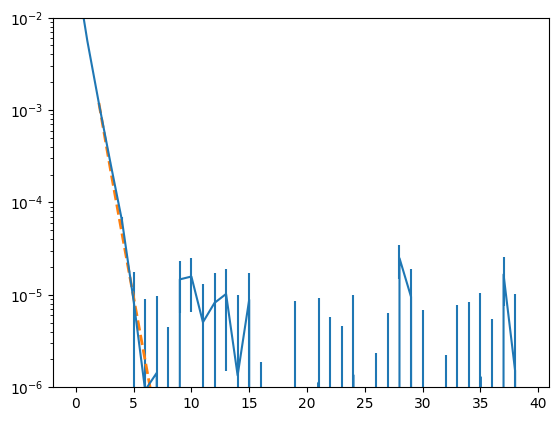

In [45]:
tmax=40

x=np.arange(tmax)

####

ell=2

y2d=ft_jk_mean[ell][:tmax]
dy2d=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y2d,dy2d, label="$\\ell=$"+str(ell))

###################

fitm=fit_list2[ell][1]
fitM=fit_list2[ell][2]
ft_jk_mean[ell][fit_min:fit_max]

x=np.arange(fitm, fitM, dtype=int)
y=ft_jk_mean[ell][fitm:fitM]
dy=np.sqrt(ft_jk_var[ell][fitm:fitM])

par, var = sp.optimize.curve_fit(ell2_scalar, x, y, p0=[0.01], sigma=dy)
#    par, var = sp.optimize.curve_fit(two_exp, x, y, p0=[1.0, 1.0, 1.0, 1.0], sigma=dy)
#     pars_.append(par)
#     vars_.append(var)

x2f=np.arange(fitm, fitM, dtype=int)
y2f=ell2_scalar(x, par[0])
plt.plot(x2f, y2f, ls="dashed", linewidth=2)

###################

plt.yscale("log")
plt.ylim(1.0e-6, 1.0e-2)

In [46]:
pars2=par[0]
errs2=np.sqrt(var[0,0])

In [47]:
print("ell=0", format_print(pars0,errs0))
print("ell=1", format_print(pars1,errs1))
print("ell=2", format_print(pars2,errs2))

ell=0 0.013447(42)
ell=1 0.012371(74)
ell=2 0.01210(15)


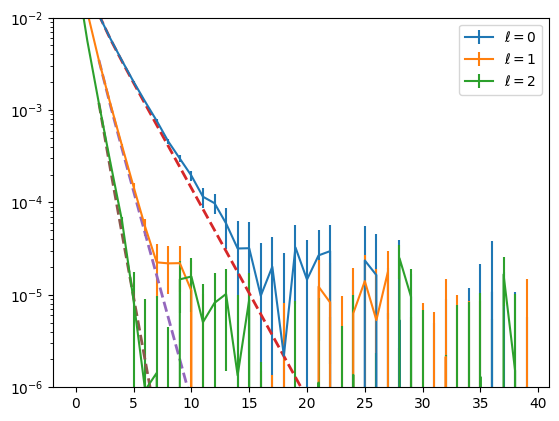

In [48]:
tmax=40
x=np.arange(tmax)

####

plt.errorbar(x,y0d,dy0d, label="$\\ell=$"+str(0))
plt.errorbar(x,y1d,dy1d, label="$\\ell=$"+str(1))
plt.errorbar(x,y2d,dy2d, label="$\\ell=$"+str(2))

###################

plt.plot(x0f, y0f, ls="dashed", linewidth=2)
plt.plot(x1f, y1f, ls="dashed", linewidth=2)
plt.plot(x2f, y2f, ls="dashed", linewidth=2)

###################

plt.yscale("log")
plt.ylim(1.0e-6, 1.0e-2)
plt.legend()

plt.savefig("TxxTxx_cos"+str(Lx)+".pdf")

In [43]:
t1=txx_list
t2=txy_list
t1t2=txx_txy_list

ft_jk_list_=[]

for i_jk in range(n_bins):
    print(i_jk)
    t1t2_jk=np.mean(np.delete(t1t2[nskip:], np.s_[i_jk:i_jk+binsize], axis=0), axis=0)
    t1_jk=np.mean(np.delete(t1[nskip:], np.s_[i_jk:i_jk+binsize], axis=0), axis=0)
    t2_jk=np.mean(np.delete(t2[nskip:], np.s_[i_jk:i_jk+binsize], axis=0), axis=0)
    #
    t1t2_conn_jk=t1t2_jk-t1_jk*t2_jk
    #
    tmp=np.array(
        [
            [
                np.sum([t1t2_conn_jk[x,t]*np.sin(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
                for t in range(r*Lx)]
            for k in range(Lx)
        ])
    #
    ft_jk_list_.append(tmp)
ft_jk_list=np.array(ft_jk_list_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [44]:
ft_jk_mean=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(n_bins):
    ft_jk_mean+=ft_jk_list[i_jk]

ft_jk_mean/=n_bins

In [45]:
ft_jk_var=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(1,n_bins):
    ft_jk_var += ( ft_jk_list[i_jk]-ft_jk_mean )**2

ft_jk_var*=(n_bins-1.0)/n_bins

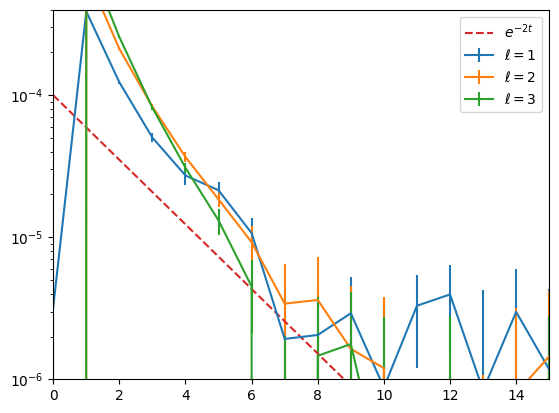

In [46]:
tmax=40

x=np.arange(tmax)

####

ell=1

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))

# delta=2.0
# coeff=0.0001
# plt.plot(coeff*np.exp(-delta*a_lat*x))

####

ell=2

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))

# delta=5.0
# coeff=0.001
# plt.plot(coeff*np.exp(-delta*a_lat*x))

# ####

ell=3

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))

####


delta=2.0
coeff=0.0001
plt.plot(coeff*np.exp(-delta*a_lat*x), ls="dashed", label="$e^{-2t}$")



# plt.plot(ft[1][:40], label="$\\ell=1$")
# plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")

# plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
plt.legend()
# plt.title("odd part (sin)")

plt.yscale("log")

plt.xlim(0.0,15.0)
plt.ylim(1.0e-6, 4.0e-4)

plt.legend()
plt.savefig("TxxTxy_sin"+str(Lx)+".pdf")

In [47]:
pwd

'/projectnb/qfe/nmatsumo/QFE_copy/nm/corr_w_ckpt_2'

In [53]:
def chisq( data_2d, err_2d ):
    ell0m=data_2d[0]
    ell0e=err_2d[0]
    ell1m=data_2d[1]
    ell1e=err_2d[1]
    ell2m=data_2d[2]
    ell2e=err_2d[2]
    
    

In [54]:
ell0m=

SyntaxError: invalid syntax (2212925853.py, line 1)

In [78]:
t1=txx_list
t2=txy_list
t1t2=txx_txy_list

ft_jk_list_=[]

for i_jk in range(n_bins):
    print(i_jk)
    t1t2_jk=np.mean(np.delete(t1t2[nskip:], i_jk, axis=0), axis=0)
    t1_jk=np.mean(np.delete(t1[nskip:], i_jk, axis=0), axis=0)
    t2_jk=np.mean(np.delete(t2[nskip:], i_jk, axis=0), axis=0)
    #
    t1t2_conn_jk=t1t2_jk-t1_jk*t2_jk
    #
    tmp=np.array(
        [
            [
                np.sum([t1t2_conn_jk[x,t]*np.sin(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
                for t in range(r*Lx)]
            for k in range(Lx)
        ])
    #
    ft_jk_list_.append(tmp)
ft_jk_list=np.array(ft_jk_list_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [79]:
ft_jk_mean=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(n_bins):
    ft_jk_mean+=ft_jk_list[i_jk]

ft_jk_mean/=n_bins

In [80]:
ft_jk_var=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(1,n_bins):
    ft_jk_var += ( ft_jk_list[i_jk]-ft_jk_mean )**2

ft_jk_var*=(n_bins-1.0)/n_bins

(1e-06, 0.0004)

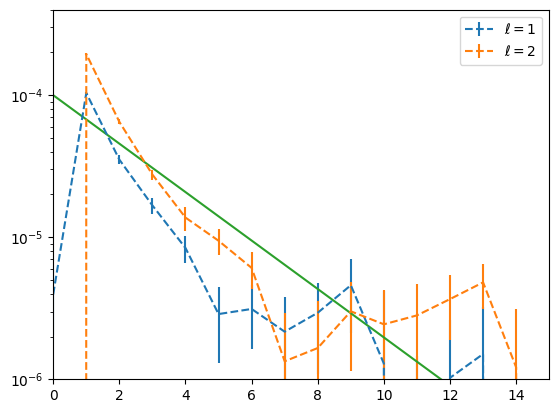

In [81]:
tmax=40

x=np.arange(tmax)

####

ell=1

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell), ls="dashed")

# delta=2.0
# coeff=0.0001
# plt.plot(coeff*np.exp(-delta*a_lat*x))

####

ell=2

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell), ls="dashed")

delta=3.0
coeff=0.0001
plt.plot(coeff*np.exp(-delta*a_lat*x))

####

# plt.plot(ft[1][:40], label="$\\ell=1$")
# plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")

# plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
# plt.legend()
# plt.title("odd part (sin)")

plt.yscale("log")
plt.legend()
plt.xlim(0.0,15.0)
plt.ylim(1.0e-6, 4.0e-4)

In [82]:
sum_theta [sin(ell*theta) <txx(0,0) txy(t,theta)>]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3470904177.py, line 1)

In [ ]:
1.0 + 1.0/np.tanh(a_lat*t)

In [ ]:
# conn_jk_mean=np.full(conn_jk_list[0].shape, 0.0)

# for i_jk in range(n_bins):
#     conn_jk_mean+=conn_jk_list[i_jk]

# conn_jk_mean/=n_bins

In [ ]:
# conn_jk_var=np.full(conn_jk_list[0].shape, 0.0)

# for i_jk in range(1,n_bins):
#     conn_jk_var += ( conn_jk_list[i_jk]-conn_jk_mean )**2

# conn_jk_var*=(n_bins-1.0)/n_bins
# conn_jk_err=np.sqrt(conn_jk_var)

In [ ]:
# conn_jk_mean.shape

In [ ]:
# xy=np.array([[[x,y] for x in range(Lx)] for y in range(Ly)])

In [ ]:
xy.T[0].flatten()

In [ ]:
xy.T[1].flatten()

In [ ]:
conn_jk_mean[0]

In [ ]:
data=np.array(
    [xy.T[0].flatten(), xy.T[1].flatten(),
     conn_jk_mean.flatten(), conn_jk_mean.flatten()])

In [ ]:
data.T

In [ ]:
np.savetxt("Lx40_E1E1.dat", data.T,
            header="theta \t\t\t  t  \t\t\t  mean  \t\t\t  err")

In [ ]:
pwd

In [ ]:
ellmax=3

fit_list2=[
    [0, 6, 24],
    [1, 4, 20],
    [2, 2, 10],
#     [3, 10.0, 30.0],
#     [4, 10.0, 30.0],
]

In [ ]:
fit_min=fit_list2[ell][1]
fit_max=fit_list2[ell][2]
ft_jk_mean[ell][fit_min:fit_max]

In [ ]:
ell=2

fitm=fit_list2[ell][1]
fitM=fit_list2[ell][2]
ft_jk_mean[ell][fitm:fitM]

x=np.arange(fitm, fitM, dtype=int)
y=ft_jk_mean[ell][fitm:fitM]
dy=np.sqrt(ft_jk_var[ell][fitm:fitM])

par, var = sp.optimize.curve_fit(two_exp, x, y, p0=[1.0, 2.0, 0.001, 1.0+ell], sigma=dy)
# par = pars[i]
# var = vars[i]

In [ ]:
par, var

In [ ]:
tmax=40

pars_=[]
vars_=[]

for ell in range(ellmax):
    print(ell)
    fitm=fit_list2[ell][1]
    fitM=fit_list2[ell][2]
    
    ####
    x=np.arange(tmax)
    y=ft_jk_mean[ell][:tmax]
    dy=np.sqrt(ft_jk_var[ell][:tmax])
    plt.errorbar(x,y,dy, label="$\\ell=$"+str(ell))
    
    x=np.arange(fitm, fitM, dtype=int)
    y=ft_jk_mean[ell][fitm:fitM]
    dy=np.sqrt(ft_jk_var[ell][fitm:fitM])
    
    par, var = sp.optimize.curve_fit(two_exp, x, y, p0=[1.0, 2.0, 0.2, 1.0+ell], sigma=dy)
#    par, var = sp.optimize.curve_fit(two_exp, x, y, p0=[1.0, 1.0, 1.0, 1.0], sigma=dy)
#     pars_.append(par)
#     vars_.append(var)
    
    x=np.arange(fitm, fitM, dtype=int)
    y=two_exp(x, par[0], par[1], par[2], par[3])
    plt.plot(x, y, ls="dashed", linewidth=2)

# plt.ylim(0.15, 0.8)
# plt.xlim(0, 15)

plt.legend()
plt.yscale("log")
plt.ylim(1.0e-6, 1.0e-2)

plt.legend()
# plt.savefig("./figs/64I_all.pdf")
plt.savefig("e1_e1_cos_fitted.pdf")
plt.show()

In [ ]:
ellmax=3

In [ ]:
data = [ft_jk_mean[ell][ fit_list2[ell][1] : fit_list2[ell][2] ] for ell in range(ellmax)]

In [ ]:
err = ft_jk_var[ell][ fit_list2[ell][1] : fit_list2[ell][2] ]

In [ ]:
def chisq( data_2d, err_2d ):
    

In [77]:
t1=txx_list
t2=txx_list
t1t2=txx_txx_list

ft_jk_list_=[]

for i_jk in range(n_bins):
    print(i_jk)
    t1t2_jk=np.mean(np.delete(t1t2[nskip:], i_jk, axis=0), axis=0)
    t1_jk=np.mean(np.delete(t1[nskip:], i_jk, axis=0), axis=0)
    t2_jk=np.mean(np.delete(t2[nskip:], i_jk, axis=0), axis=0)
    #
    t1t2_conn_jk=t1t2_jk-t1_jk*t2_jk
    #
    tmp=np.array(
        [
            [
                np.sum([t1t2_conn_jk[x,t]*np.sin(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
                for t in range(r*Lx)]
            for k in range(Lx)
        ])
    #
    ft_jk_list_.append(tmp)
ft_jk_list=np.array(ft_jk_list_)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [ ]:
ft_jk_mean=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(n_bins):
    ft_jk_mean+=ft_jk_list[i_jk]

ft_jk_mean/=n_bins

In [ ]:
ft_jk_var=np.full(ft_jk_list[0].shape, 0.0)

for i_jk in range(1,n_bins):
    ft_jk_var += ( ft_jk_list[i_jk]-ft_jk_mean )**2

ft_jk_var*=(n_bins-1.0)/n_bins

In [ ]:
tmax=40

x=np.arange(tmax)

####

ell=0

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=0$")

delta=1.0
coeff=0.0025
plt.plot(coeff*np.exp(-delta*a_lat*x), ls="dashed")

####

ell=1

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=0$", ls="dashed")

delta=2.0
coeff=0.0028
plt.plot(coeff*np.exp(-delta*a_lat*x))

####

ell=2

y=ft_jk_mean[ell][:tmax]
dy=np.sqrt(ft_jk_var[ell][:tmax])
plt.errorbar(x,y,dy, label="$\\ell=0$", ls="dashed")

delta=3.0
coeff=0.0028
plt.plot(coeff*np.exp(-delta*a_lat*x))

####

# plt.plot(ft[1][:40], label="$\\ell=1$")
# plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")

# plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
# plt.legend()
# plt.title("odd part (sin)")

plt.yscale("log")

# plt.xlim(0.0,10.0)
plt.ylim(1.0e-6, 1.0e-2)

In [ ]:
ft=ft_jk

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")

# plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
# plt.legend()
# plt.title("odd part (sin)")

plt.xlim(0.0,10.0)
plt.ylim(-0.0001, 0.004)

In [ ]:
txx_txy_list[nskip:][:i_jk]

In [ ]:
nskip=1
txx_txy=np.mean(txx_txy_list[nskip:], axis=0) - np.mean(txx_list[nskip:], axis=0)*np.mean(txy_list[nskip:], axis=0)

In [ ]:
tmp=txx_txy
ft=np.array(
    [
        [
            np.sum([txx_txy[x,t]*np.sin(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
def const_exp(x, E0, A, dE):
    return E0 + A*np.exp(-alat*dE*x)

In [ ]:
xmin=2
xmax=10

In [ ]:
# x=np.arange(ft[1][:40].shape[0])
# y=ft[1][:40]
# par, var = sp.optimize.curve_fit(const_exp, x, y, p0=[0.2, 0.4, 0.6])
x=np.arange(xmin,xmax)
y=ft[1][xmin:xmax]
par, var = sp.optimize.curve_fit(const_exp, x, y, p0=[0.0, 0.4, 1.0])

In [ ]:
par

In [ ]:
y=const_exp(x, par[0], par[1], par[2])

plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")

plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
plt.legend()
plt.title("odd part (sin)")

plt.xlim(0.0,10.0)
plt.ylim(-0.0001, 0.004)

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=3.0
ct = 0.004*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-3t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("FT $\\langle T_{xx}(0) \cdot T_{xy}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("32x384")

plt.legend()

plt.yscale("log")
plt.xlim(0.0,10.0)
plt.ylim(0.00001, 0.01)

plt.savefig("txx_txy.pdf", bbox_inches="tight")

In [ ]:
tmp=txx_txy
ft=np.array(
    [
        [
            np.sum([txx_txy[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=3.0
ct = 0.004*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("FT $\\langle T_{xx}(0) \cdot T_{xy}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("32x384")

plt.legend()

plt.yscale("log")
plt.xlim(0.0,10.0)
plt.ylim(0.00001, 0.01)

plt.savefig("txx_txy.pdf", bbox_inches="tight")

In [ ]:
np.mean(txx_list[nskip:], axis=0)

In [ ]:
nskip=1
txx_txx=np.mean(txx_txx_list[nskip:], axis=0) - np.mean(txx_list[nskip:], axis=0)*np.mean(txx_list[nskip:], axis=0) - 0.004

In [ ]:
tmp=txx_txx
ft=np.array(
    [
        [
            np.sum([txx_txx[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")

In [ ]:
def const_exp(x, E0, A, dE):
    return E0 + A*np.exp(-alat*dE*x)

In [ ]:
np.arange(ft[0][:40].shape[0])

In [ ]:
xmin=6
xmax=16

In [ ]:
ell_fit=0

x=np.arange(xmin,xmax)
y=ft[ell_fit][xmin:xmax]
par, var = sp.optimize.curve_fit(const_exp, x, y, p0=[0.0, 0.4, 1.0])

In [ ]:
par

In [ ]:
y=const_exp(x, par[0], par[1], par[2])

plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")

plt.plot(x, y, label="fit", ls="dashed", linewidth=3)
plt.legend()

plt.title("even part (cos)")

plt.xlim(0.0, xmax+2)
plt.ylim(-0.005, 0.04)

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=1.0
ct = 0.004*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-3t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("FT $\\langle T_{xx}(0) \cdot T_{xy}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("32x384")

plt.legend()

plt.yscale("log")
plt.xlim(0.0,10.0)
plt.ylim(0.00001, 0.01)

# plt.savefig("txx_txy.pdf", bbox_inches="tight")

In [ ]:
nskip=1
txy_txx=np.mean(txy_txx_list[nskip:], axis=0)

In [ ]:
tmp=txy_txx
ft=np.array(
    [
        [
            np.sum([txy_txx[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
nskip=1
txx_txy=np.mean(txx_txy_list[nskip:], axis=0)

In [ ]:
tmp=txx_txy
ft=np.array(
    [
        [
            np.sum([txx_txy[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
Ly

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=6.0
ct = 0.0016*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-6t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("FT $\\langle T_{xx}(0) \cdot T_{xy}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("48x384")

plt.legend()

plt.yscale("log")
plt.xlim(0.0,10.0)
plt.ylim(0.00001, 0.01)

plt.savefig("txx_txy.pdf", bbox_inches="tight")

In [ ]:
Ly

In [ ]:
# plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(-ft[1][:40], label="$\\ell=1$")
plt.plot(-ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=6.0
ct = 0.002*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-6t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("- FT $\\langle T_{xy}(0) \cdot T_{xx}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("48x384")

plt.legend()

plt.yscale("log")
plt.xlim(0.0,10.0)
plt.ylim(0.00001, 0.01)

plt.savefig("txy_txx.pdf", bbox_inches="tight")

In [ ]:
nskip=1
tyy_txy=np.mean(tyy_txy_list[nskip:], axis=0)

In [ ]:
tmp=tyy_txy
ft=np.array(
    [
        [
            np.sum([tyy_txy[x,t]*np.sin(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
Ly

In [ ]:
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")

In [ ]:
# plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=6.0
ct = 0.0014*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-6t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("FT $\\langle T_{yy}(0) \cdot T_{xy}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("48x384")

plt.legend()

plt.yscale("log")
# plt.xlim(0.0,10.0)
# plt.ylim(0.00001, 0.01)

plt.savefig("tyy_txy.pdf", bbox_inches="tight")

In [ ]:
nskip=1
txy_tyy=np.mean(txy_tyy_list[nskip:], axis=0)

In [ ]:
tmp=txy_tyy
ft=np.array(
    [
        [
            np.sum([txy_tyy[x,t]*np.sin(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
Ly

In [ ]:
# plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(-ft[1][:40], label="$\\ell=1$")
plt.plot(-ft[2][:40], label="$\\ell=2$")
# plt.plot(ft[3][:40], label="$\\ell=3$")
# plt.plot(ft[4][:40], label="$\\ell=4$")
# plt.plot(ft[5][:40], label="$\\ell=5$")


t = np.arange(0,40)
Delta=6.0
ct = 0.0014*np.exp(-t*alat*Delta)
plt.plot(t,ct, ls="dashed", label="$e^{-6t}$")

# plt.ylim(0.00001, 1.0)
# plt.xlim(0.0, 40.0)

plt.ylabel("-FT $\\langle T_{xy}(0) \cdot T_{yy}(t,x) \\rangle$")
plt.xlabel("$t$")

plt.title("48x384")

plt.legend()

plt.yscale("log")
plt.xlim(0.0,10.0)
plt.ylim(0.00001, 0.01)

plt.savefig("txy_tyy.pdf", bbox_inches="tight")

In [ ]:
nskip=1
s_s=np.mean(s_s_list[nskip:], axis=0)

In [ ]:
tmp=s_s
ft=np.array(
    [
        [
            np.sum([s_s[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")
plt.plot(ft[4][:40], label="$\\ell=4$")
plt.plot(ft[5][:40], label="$\\ell=5$")

# t = np.arange(0,40)
# Delta=1.0/8.0
# ct = 100.0*np.exp(-t*alat*Delta)
# plt.plot(t,ct, ls="dashed")

plt.ylim(0.00001, 1.0)
plt.xlim(0.0, 40.0)

plt.ylabel("$\\langle \\sigma_{\\ell,t=0} \cdot \\sigma_{\\ell,t} \\rangle$")
plt.xlabel("$t$")

plt.title("48x384")

plt.legend()

plt.yscale("log")

# plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
# plt.plot(ft[0][:15], label="$\\ell=0$")
# plt.plot(ft[1][:15], label="$\\ell=1$")
# plt.plot(ft[2][:15], label="$\\ell=2$")
# plt.plot(ft[3][:15], label="$\\ell=3$")
# plt.plot(ft[4][:15], label="$\\ell=4$")
# plt.plot(ft[5][:15], label="$\\ell=5$")
# plt.plot(ft[6][:15], label="$\\ell=6$")


# # for ell in range(7):
# #     t = np.arange(0,16)
# #     ct = np.exp(-t*alat*(Delta+ell))
# #     plt.plot(t, ct/ct[0], ls="dashed", c="gray", 
# #              alpha=0.5,
# #              label="$\\ell=$"+str(ell)+" analytic")

# plt.yscale("log")

# plt.ylabel("$\\langle \\sigma_{k,t=0} \cdot \\sigma_{k,t} \\rangle$")
# plt.xlabel("$t$")

# plt.title("32x256")

# plt.legend()

# plt.xlim(0.0,16.0)
# plt.ylim(1.0e-3,1.0)

# # plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
def axpb(x, a, b):
    return a*x + b

In [ ]:
def caexp_mex(x, c, a, e):
    return c + a*np.exp(-e*x)

In [ ]:
delta_list=[]

In [ ]:
ell=0

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=10
xmax=30
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-1, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
mass0=-a

In [ ]:
ell=0

y=ft[ell]
x=np.arange(y.shape[0])
# plt.plot(y, label="$\\ell=$"+str(ell))
leading=np.exp(-mass0 * x)
yp = y/leading
plt.plot(yp, label="$\\ell=$"+str(ell)+", $C(t)/\\exp(-E_0 t)$")

xmin=3
xmax=20
x=np.arange(xmin, xmax)
par, var = sp.optimize.curve_fit( caexp_mex, x, yp[xmin:xmax] )
plt.plot( x, caexp_mex(x, par[0], par[1], par[2]), label="$A + C e^{-E_1 t}$" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(0.42, 0.45)

plt.savefig("ell0_leading_divided.png")

In [ ]:
print(par[2]/a_lat, 2.0+1.0/8)

In [ ]:
print(mass0/a_lat, 1.0/8)

In [ ]:
ell=1

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=12
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
mass0=-a

In [ ]:
ell=1

y=ft[ell]
x=np.arange(y.shape[0])
# plt.plot(y, label="$\\ell=$"+str(ell))
leading=np.exp(-mass0 * x)
yp = y/leading
plt.plot(yp, label="$\\ell=$"+str(ell))

xmin=2
xmax=8
x=np.arange(xmin, xmax)
par, var = sp.optimize.curve_fit( caexp_mex, x, yp[xmin:xmax] )
plt.plot( x, caexp_mex(x, par[0], par[1], par[2]), label="fit" )

plt.legend()
plt.xlim(0, 20)
plt.ylim(0.04, 0.08)

In [ ]:
par

In [ ]:
print(par[2]/a_lat, 3.0+1.0/8)

In [ ]:
print(mass0/a_lat, 1.0 + 1.0/8)

In [ ]:
ell=2

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=10
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=3

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=2
xmax=8
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=4

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=1
xmax=5
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
delta_list

In [ ]:
a32_list=np.array([[0, 0.02389256709118499],
 [1, 0.22255784720193167],
 [2, 0.4137005128984015],
 [3, 0.5998641605815322],
 [4, 0.78630383991516]])

In [ ]:
a48_list=np.array([[0, 0.016259087308350503],
 [1, 0.1520023212359083],
 [2, 0.2830264524101229],
 [3, 0.4162099802375052],
 [4, 0.5563355332259683]])

In [ ]:
plt.plot(a32_list.T[0], a32_list.T[1]/(np.pi*2.0/32.0), label="32x256", marker="o")
plt.plot(a48_list.T[0], a48_list.T[1]/(np.pi*2.0/48.0), label="48x354", marker="s")

x=np.arange(5)
plt.plot(x, x+1.0/8, ls="dashed", label="exact")

plt.xlabel("$\\ell$")
plt.ylabel("$\\Delta_\\sigma+\\ell$")

plt.legend()

plt.savefig("sigma_scaling.eps", bbox_inches="tight")

In [ ]:
nskip=1
tmp2=np.array([tx_tx_list[i]-tx_list[i]**2 for i in range(nskip,len(nrange))])
tmp=np.mean(tmp2, axis=0)

ft=np.array(
    [
        [
            np.sum([tmp[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")
plt.plot(ft[4][:40], label="$\\ell=4$")
plt.plot(ft[5][:40], label="$\\ell=5$")

# t = np.arange(0,40)
# Delta=1.0/8.0
# ct = 100.0*np.exp(-t*alat*Delta)
# plt.plot(t,ct, ls="dashed")

plt.ylim(0.00001, 1.0)
plt.xlim(0.0, 40.0)

plt.ylabel("$\\langle \\epsilon_{\\ell,t=0} \cdot \\epsilon_{\\ell,t} \\rangle$")
plt.xlabel("$t$")

plt.title("48x384")

plt.legend()

plt.yscale("log")

# plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
def axpb(x, a, b):
    return a*x + b

In [ ]:
def two_exp(x, E1, E2, A1, A2):
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [ ]:
def three_exp(x, E1, E2, E3, A1, A2, A3):
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x) + A3*np.exp(-E3*x)

In [ ]:
def three_exp_fixedE(x, E3, A1, A2, A3):
    E1=1.0*a_lat; E2=2.0*a_lat
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x) + A3*np.exp(-E3*x)

In [ ]:
def two_exp_fixedE(x, A1, A2):
    E1=1.0*a_lat; E2=2.0*a_lat
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [ ]:
a_lat=(np.pi*2.0/48.0)

In [ ]:
ell=0
y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))



# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E1, E2, E3, A1, A2, A3], var = sp.optimize.curve_fit( three_exp, x, y[xmin:xmax] )
# plt.plot( x, three_exp(x, E1, E2, E3, A1, A2, A3), label="fit" )



# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E3, A1, A2, A3], var = sp.optimize.curve_fit( three_exp_fixedE, x, y[xmin:xmax] )
# plt.plot( x, three_exp_fixedE(x, E3, A1, A2, A3), label="fit" )



# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E1, E2, E3, A1, A2, A3], var = sp.optimize.curve_fit( three_exp, x, y[xmin:xmax] )
# plt.plot( x, three_exp(x, E1, E2, E3, A1, A2, A3), label="fit" )


xmin=1
xmax=20
x=np.arange(xmin, xmax)
[E1, E2, A1, A2], var = sp.optimize.curve_fit( two_exp, x, y[xmin:xmax] )
plt.plot( x, two_exp(x, E1, E2, A1, A2), label="fit" )

# xmin=1
# xmax=8
# x=np.arange(xmin, xmax)
# [A1, A2], var = sp.optimize.curve_fit( two_exp_fixedE, x, y[xmin:xmax] )
# plt.plot( x, two_exp_fixedE(x, A1, A2), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# plt.plot( x, 0.008*np.exp(-x*a_lat), label="exp(-x)" )

# xmin=0
# xmax=8
# x=np.arange(xmin, xmax)
# plt.plot( x, 0.018*np.exp(-2.0*x*a_lat), label="exp(-2.0*x)" )

print(E1/a_lat, E2/a_lat)
# print(E3/a_lat)

In [ ]:
A1

In [ ]:
A2

In [ ]:
A3

$$
    t \equiv \sum_\mu (s_x-s_{x+\mu})^2
$$

In [ ]:
nskip=1
tmp2=np.array([t_t_list[i]-t_list[i]**2 for i in range(nskip,len(nrange))])
tmp=np.mean(tmp2, axis=0)

ft=np.array(
    [
        [
            np.sum([tmp[x,t]*np.cos(2.0*np.pi*k*x/Lx) for x in range(Lx)]) / Lx 
            for t in range(r*Lx)]
        for k in range(Lx)])

In [ ]:
alat=2.0*np.pi/Lx

In [ ]:
plt.plot(ft[0][:40], label="$\\ell=0$")
plt.plot(ft[1][:40], label="$\\ell=1$")
plt.plot(ft[2][:40], label="$\\ell=2$")
plt.plot(ft[3][:40], label="$\\ell=3$")
plt.plot(ft[4][:40], label="$\\ell=4$")
plt.plot(ft[5][:40], label="$\\ell=5$")

# t = np.arange(0,40)
# Delta=1.0/8.0
# ct = 100.0*np.exp(-t*alat*Delta)
# plt.plot(t,ct, ls="dashed")

plt.ylim(0.00001, 1.0)
plt.xlim(0.0, 40.0)

plt.ylabel("$\\langle \\sigma_{\\ell,t=0} \cdot \\sigma_{\\ell,t} \\rangle$")
plt.xlabel("$t$")

plt.title("32x256")

plt.legend()

plt.yscale("log")

# plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
# plt.plot(ft[0][:15], label="$\\ell=0$")
# plt.plot(ft[1][:15], label="$\\ell=1$")
# plt.plot(ft[2][:15], label="$\\ell=2$")
# plt.plot(ft[3][:15], label="$\\ell=3$")
# plt.plot(ft[4][:15], label="$\\ell=4$")
# plt.plot(ft[5][:15], label="$\\ell=5$")
# plt.plot(ft[6][:15], label="$\\ell=6$")


# # for ell in range(7):
# #     t = np.arange(0,16)
# #     ct = np.exp(-t*alat*(Delta+ell))
# #     plt.plot(t, ct/ct[0], ls="dashed", c="gray", 
# #              alpha=0.5,
# #              label="$\\ell=$"+str(ell)+" analytic")

# plt.yscale("log")

# plt.ylabel("$\\langle \\sigma_{k,t=0} \cdot \\sigma_{k,t} \\rangle$")
# plt.xlabel("$t$")

# plt.title("32x256")

# plt.legend()

# plt.xlim(0.0,16.0)
# plt.ylim(1.0e-3,1.0)

# # plt.savefig("sigma.eps", bbox_inches="tight")

In [ ]:
def axpb(x, a, b):
    return a*x + b

In [ ]:
def two_exp(x, E1, E2, A1, A2):
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [ ]:
def two_exp_fixedE(x, A1, A2):
    E1=1; E2=2
    return A1*np.exp(-E1*x) + A2*np.exp(-E2*x)

In [ ]:
a_lat=(np.pi*2.0/48.0)

In [ ]:
ell=0
y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

# xmin=1
# xmax=20
# x=np.arange(xmin, xmax)
# [E1, E2, A1, A2], var = sp.optimize.curve_fit( two_exp, x, y[xmin:xmax] )
# plt.plot( x, two_exp(x, E1, E2, A1, A2), label="fit" )

# xmin=1
# xmax=5
# x=np.arange(xmin, xmax)
# [A1, A2], var = sp.optimize.curve_fit( two_exp_fixedE, x, y[xmin:xmax] )
# plt.plot( x, two_exp_fixedE(x, A1, A2), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

xmin=1
xmax=20
x=np.arange(xmin, xmax)
plt.plot( x, 0.008*np.exp(-x*a_lat), label="exp(-x)" )

xmin=0
xmax=8
x=np.arange(xmin, xmax)
plt.plot( x, 0.018*np.exp(-2.0*x*a_lat), label="exp(-2.0*x)" )

# print(E1/a_lat, E2/a_lat)

$$
    t \equiv \sum_\mu (s_x-s_{x+\mu})^2
$$

In [ ]:
delta_list=[]

In [ ]:
ell=0

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=0
xmax=2
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=0

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=7
xmax=20
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
a48_list.T[1]/(np.pi*2.0/48.0)

In [ ]:
ell=1

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=12
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=2

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=4
xmax=10
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=3

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=2
xmax=8
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
ell=4

y=ft[ell]

plt.plot(y, label="$\\ell=$"+str(ell))

xmin=2
xmax=5
x=np.arange(xmin, xmax)
[a, b], var = sp.optimize.curve_fit( axpb, x, np.log(y[xmin:xmax]) )
plt.plot( x, np.exp( axpb(x, a, b) ), label="fit" )

plt.legend()
plt.xlim(0, 40)
plt.ylim(1.0e-6, 1.0)
plt.yscale("log")

print(-a, b)
delta_list.append([ell,-a])

In [ ]:
delta_list

In [ ]:
a32_list=np.array(
[[0, 0.19395521240150024],
 [1, 0.4235009274364022],
 [2, 0.608073640924816],
 [3, 0.9238354571740328],
 [4, 1.0874192327676853]]
)

In [ ]:
a48_list=np.array(
[[0, 0.15410954951424244],
 [1, 0.32503912755985986],
 [2, 0.47677956179712866],
 [3, 0.6260486320704013],
 [4, 0.9170758619156727]]
)

In [ ]:
a32_list.T[1]/(np.pi*2.0/32.0)

In [ ]:
a48_list.T[1]/(np.pi*2.0/48.0)

In [ ]:
plt.plot(a32_list.T[0], a32_list.T[1]/(np.pi*2.0/32.0), label="32x256", marker="o")
plt.plot(a48_list.T[0], a48_list.T[1]/(np.pi*2.0/48.0), label="48x354", marker="s")

x=np.arange(5)
plt.plot(x, x+1.0, ls="dashed", label="exact")

plt.xlabel("$\\ell$")
plt.ylabel("$\\Delta_\\epsilon+\\ell$")

plt.legend()

plt.savefig("epsilon_scaling.eps", bbox_inches="tight")